In [4]:
## Author: Mussa Ngosha

In [5]:
## This notebook aims at visualizing NDBC mooring and ARGO float Dataset with plots by converting xarray datasets into pandas Dataframes

In [6]:
## import the required libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr

In [8]:
sns.set()

In [9]:
## Open dataset for NDBC mooring
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

In [10]:
## Subset the dataset for one year
ds_one = ds.sel(time = slice('2019-01-01','2020-01-01'))

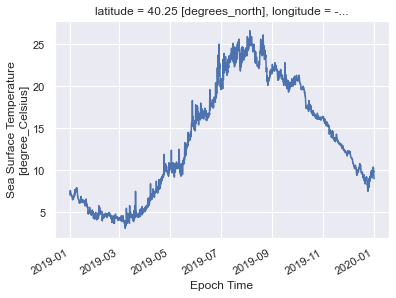

In [11]:
## Ploating graphs using plot function from xarray library
# Built in xarray plotting, but ebven pandas has got built-in plot function
ds_one.sea_surface_temperature.plot()

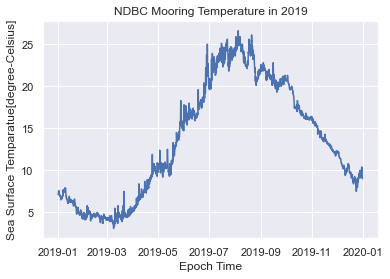

In [12]:
# Plot using matplotlib - Correctly plotted with time
plt.plot(ds_one.time,ds_one.sea_surface_temperature.squeeze())
plt.xlabel('Epoch Time')
plt.ylabel('Sea Surface Temparatue[degree-Celsius]')
plt.title('NDBC Mooring Temperature in 2019')
plt.show()

In [13]:
## For simplicity customization of plots we can convert xarray dataset into pandas dataframe
# Convert to Pandas Dataframe
df = ds_one.to_dataframe().reset_index().set_index('time')
## Display pandas Dataframe
df.head()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,0 days 00:00:05.559999943,0 days 00:00:04.710000038,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,0 days 00:00:05.880000114,0 days 00:00:05.090000153,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,0 days 00:00:06.250000,0 days 00:00:05.219999790,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN
2019-01-01 03:50:00,40.250999,-73.164001,150.0,13.7,16.9,2.52,0 days 00:00:06.670000076,0 days 00:00:05.489999771,148.0,1010.700012,9.5,7.2,NaN,NaN,NaN
2019-01-01 04:50:00,40.250999,-73.164001,168.0,9.5,11.2,2.77,0 days 00:00:07.139999866,0 days 00:00:05.750000,141.0,1010.000000,10.2,7.2,NaN,NaN,NaN


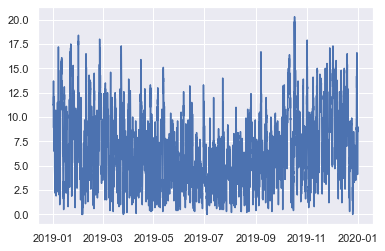

In [14]:
plt.plot(ds_one.time, ds_one.wind_spd.squeeze())
plt.show()

In [15]:
## Exporting Data
## One quick aside... Pandas also allows you to quickly export your data, which you can use to load the dataset into another program like Excel. Here's a quick example.

In [16]:
df[['air_temperature','sea_surface_temperature','wind_spd']].to_csv('D:/ODL/44025data.csv')

In [17]:
## Customizing Timeseries Plots

In [18]:
## Customizing Lines
## Here are some of the more common parameters you will typically use when creating your plot.
### linewidth - For example 0.5, 1, 2...
### linestyle - For example '-','--', or ':' or other basic or advanced styles
### color
### marker

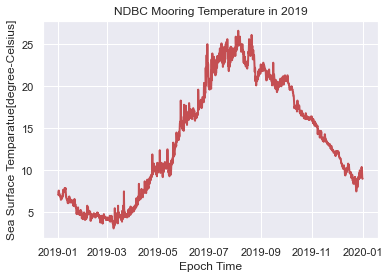

In [19]:
# Plot using matplotlib - Correctly plotted with time
from matplotlib.lines import lineStyles
from seaborn import color_palette


plt.plot(ds_one.time,ds_one.sea_surface_temperature.squeeze(), color = 'r', linestyle = '-', linewidth = '2')
plt.xlabel('Epoch Time')
plt.ylabel('Sea Surface Temparatue[degree-Celsius]')
plt.title('NDBC Mooring Temperature in 2019')
plt.show()

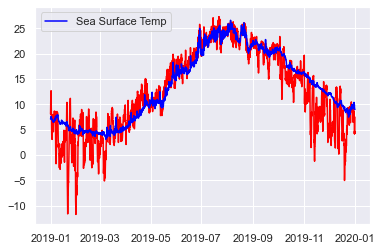

In [20]:
## Ploating multiple graphs
plt.plot(df.index,df.air_temperature, color='red')
plt.plot(df.index,df.sea_surface_temperature, color='blue', label='Sea Surface Temp')
plt.legend();

In [21]:
## Adding Subplots and Saving
## We can create a figure with multiple plots using the subplots feature.

## And we can save a figure to a file using fig.savefig()

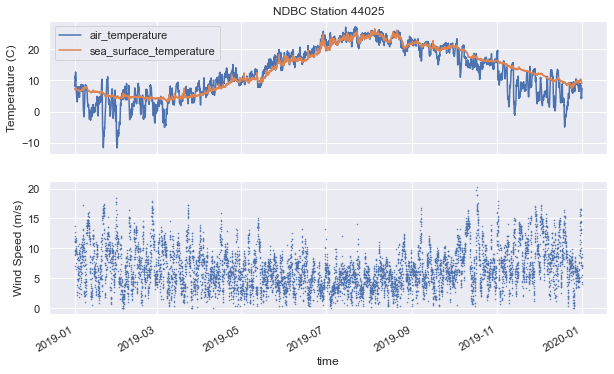

In [22]:
# Subplot example
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

df.air_temperature.plot(ax=ax1)
df.sea_surface_temperature.plot(ax=ax1)
df.wind_spd.plot(ax=ax2, marker='.',linestyle='',markersize=1)

ax1.legend()
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Wind Speed (m/s)')
ax1.set_title('NDBC Station 44025');

# Save the figure to a file
fig.savefig('44025_example.png')

In [ ]:
## Two Axes on the same Plot
## In addition to using subplots, some scientists like to plot two variables on the same graph. For example, you can create two y-axes using the left and right sides. Using 2 x-axes is also common with CTD profile plots.


## The following example uses 2 y-axes to plot both Water Temperature and Dissolved Oxygen from an estuarine site near Atlantic City. This was adapted from this example.

## Also, noticed how we can load, subset and convert from xarray to pandas all in one line. This "chaining" of commands, is one of the great features of Python.

In [23]:
# Load a JCNERR Estuarine Station from NDBC
nerr = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/ocean/jctn4/jctn4o9999.nc')
nerr = nerr.sel(time=slice('2019-06-01','2020-06-01')).to_dataframe().reset_index().set_index('time')

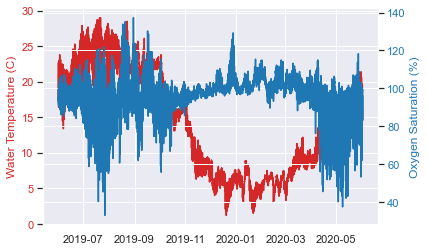

In [24]:
# A graph with 2 Y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() # Create a second axes that shares the same x-axis

color = 'tab:red'
ax1.plot(nerr.index, nerr.water_temperature, color=color)
ax1.set_ylabel('Water Temperature (C)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2.plot(nerr.index, nerr.o2_saturation, color=color)
ax2.set_ylabel('Oxygen Saturation (%)', color=color)  
ax2.tick_params(axis='y', labelcolor=color)